# Выделение контуров при помощи операций градиента и лапласиана
В данной работе будет продемонстрировано выделение контуров изображения при помощи операторо градиента и лапласиана. Для начала импортируем все необходимые модули для работы.

In [1]:
import numpy as np
from analysis.preprocessing import step_function
%matplotlib inline
import reader
import grapher

Далее загрузим и покажем исходное изображение.

Image shape:  (300, 400)


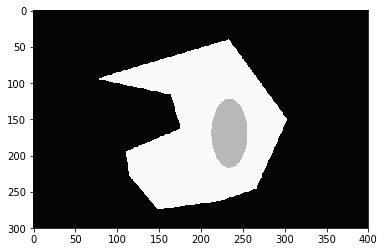

In [2]:
col_num, row_num, depth, image_data = reader.jpg_reader("data/MODEL.jpg", channels=1)
print('Image shape: ', image_data.shape)
grapher.set_image(image_data, cmap="gray")

Для осуществления градиентного преобразования можно использовать вычисление свертки изображение с масками Собеля. Для этого определим функцию 2d свертки следующим образом

In [3]:
def convolution2d(array: np.ndarray, kernel: np.ndarray, expand_borders: bool = True):
	m, n = kernel.shape
	if m != n:
		raise NotImplementedError("Square kernel shape is supported only")
	if m % 2 != 1:
		raise NotImplementedError("Only odd kernels are allowed (1x1, 3x3, 5x5 etc)")
	y, x = array.shape

	m2 = m // 2
	# Expand dims of old image
	exp_y = y + m - 1
	exp_x = x + m - 1
	expanded_array = np.zeros((exp_y, exp_x), dtype=array.dtype)
	expanded_array[m2:-m2, m2:-m2] = array

	# Convolve image with kernel
	new_image = np.empty_like(array)
	for i in range(y):
		for j in range(x):
			new_image[i][j] = np.sum(expanded_array[i:(i + m), j:(j + m)] * kernel)
	return new_image

Далее с помощью данной операции мы применяем маски собеля для вычисления горизонтальных и вертикальных линий и складываем их результат, а затем обрабатываем с помощью пороговой функции. Итоговое изображение содержит в себе информацию о границах объекта с точностью равной размерности нашей маски.

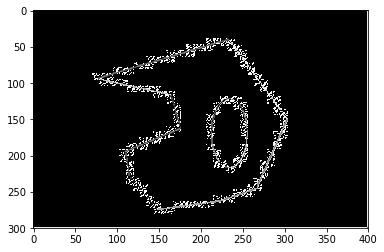

In [4]:
kern = np.array([[-1, -2, -1],[0,0,0], [1,2,1]])
result = convolution2d(image_data, kern)

kern = np.array([[-1, 0, 1],[-2,0,2], [-1,0,1]])
result += convolution2d(image_data, kern)

result = step_function(result, 0, 255)

grapher.set_image(result, cmap="gray")
grapher.show()

Аналогичным образом применяется лапласиан и вычисляются границы на его основе.

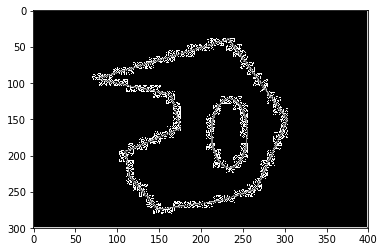

In [5]:
kern = np.array([[-1, -1, -1],[-1, 8, -1], [-1, -1, -1]])
result = convolution2d(image_data, kern)
result = step_function(result, 0, 255)
grapher.set_image(result, cmap="gray")
grapher.show()